### mart 판매 데이터를 기반으로 판매액을 예측하시오.
- 제공된 데이터 목록: mart_train.csv (훈련 데이터), mart_test.csv (평가용 데이터)
- 예측할 컬럼: total (총 판매액)
학습용 데이터(mart_train.csv)를 이용하여 총 판매액을 예측하는 모델을 만든 후, 이를 평가용 데이터(mart_test.csv)에 적용하여 얻은 예측값을 다음과 같은 형식의 CSV 파일로 생성하시오.
- 제출 파일은 다음 한 개의 컬럼을 포함해야 합니다.
- pred: 예측된 총 판매액
- 제출 파일명: 'result.csv'
- 제출한 모델의 성능은 RMSE(Root Mean Square Error) 평가지표에 따라 채점한다.
- 제출 CSV 파일명 및 형태: result.csv

~~~
pred
10000
20000
30000
40000
...
~~~

### 답안 제출 참고
- pd.read_csv('result.csv') 로 제출 코드 확인

# 1. 문제정의
- RMSE
- target: total
- 예측 파일명: result.csv
- 컬럼 1개(pred)

# 2. 라이브러리 및 데이터 불러오기

In [1]:
# 데이터 불러오기
import pandas as pd
train = pd.read_csv("p7_type2/mart_train.csv")
test = pd.read_csv("p7_type2/mart_test.csv")

# 3.EDA

In [2]:
train.head()

,branch,city,customer_type,gender,product_line,total,payment_method,rating,time_of_day,day_name
0,A,Yangon,Member,Female,Health and beauty,823457.25,Ewallet,9.1,afternoon,Saturday
1,C,Naypyitaw,Normal,Female,Electronic accessories,120330.00,Cash,9.6,morning,Friday
2,A,Yangon,Normal,Male,Home and lifestyle,510788.25,Credit card,7.4,afternoon,Sunday
3,A,Yangon,Member,Male,Health and beauty,733572.00,Ewallet,8.4,evening,Sunday
4,A,Yangon,Normal,Male,Sports and travel,951567.75,Ewallet,5.3,morning,Friday


In [3]:
test.head()

,branch,city,customer_type,gender,product_line,payment_method,rating,time_of_day,day_name
0,C,Naypyitaw,Normal,Female,Fashion accessories,Ewallet,9.6,afternoon,Thursday
1,B,Mandalay,Normal,Male,Food and beverages,Credit card,4.3,evening,Wednesday
2,B,Mandalay,Member,Female,Fashion accessories,Credit card,5.0,evening,Wednesday
3,B,Mandalay,Member,Male,Health and beauty,Cash,9.2,morning,Sunday
4,B,Mandalay,Member,Female,Home and lifestyle,Cash,6.3,afternoon,Saturday


In [4]:
train.shape, test.shape

((700, 10), (300, 9))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   branch          700 non-null    object 
 1   city            700 non-null    object 
 2   customer_type   700 non-null    object 
 3   gender          700 non-null    object 
 4   product_line    700 non-null    object 
 5   total           700 non-null    float64
 6   payment_method  700 non-null    object 
 7   rating          700 non-null    float64
 8   time_of_day     700 non-null    object 
 9   day_name        700 non-null    object 
dtypes: float64(2), object(8)
memory usage: 54.8+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   branch          300 non-null    object 
 1   city            300 non-null    object 
 2   customer_type   300 non-null    object 
 3   gender          300 non-null    object 
 4   product_line    300 non-null    object 
 5   payment_method  300 non-null    object 
 6   rating          300 non-null    float64
 7   time_of_day     300 non-null    object 
 8   day_name        300 non-null    object 
dtypes: float64(1), object(8)
memory usage: 21.2+ KB


In [7]:
train.describe()

,total,rating
count,7.000000e+02,700.000000
mean,4.850780e+05,7.003429
std,3.643907e+05,1.713078
min,1.904175e+04,4.000000
25%,2.001195e+05,5.500000
50%,3.818745e+05,7.000000
75%,7.061276e+05,8.425000
max,1.563975e+06,10.000000


In [8]:
train.describe(include='O')

,branch,city,customer_type,gender,product_line,payment_method,time_of_day,day_name
count,700,700,700,700,700,700,700,700
unique,3,3,2,2,6,3,3,7
top,A,Yangon,Normal,Male,Sports and travel,Cash,evening,Saturday
freq,236,236,354,356,127,246,309,114


In [9]:
test.describe()

,rating
count,300.000000
mean,6.901000
std,1.732099
min,4.000000
25%,5.500000
50%,6.800000
75%,8.500000
max,10.000000


In [10]:
test.describe(include='O')

,branch,city,customer_type,gender,product_line,payment_method,time_of_day,day_name
count,300,300,300,300,300,300,300,300
unique,3,3,2,2,6,3,3,7
top,A,Yangon,Member,Female,Electronic accessories,Ewallet,evening,Saturday
freq,104,104,155,157,58,110,123,50


In [11]:
train.isnull().sum()

branch            0
city              0
customer_type     0
gender            0
product_line      0
total             0
payment_method    0
rating            0
time_of_day       0
day_name          0
dtype: int64

In [12]:
test.isnull().sum()

branch            0
city              0
customer_type     0
gender            0
product_line      0
payment_method    0
rating            0
time_of_day       0
day_name          0
dtype: int64

In [14]:
train['total'].value_counts()

283641.75     2
263875.50     2
415422.00     2
326450.25     2
130851.00     2
             ..
293391.00     1
137103.75     1
348232.50     1
104107.50     1
1535625.00    1
Name: total, Length: 695, dtype: int64

In [15]:
pd.set_option('display.float_format', '{:.10f}'.format)
train['total'].describe()

count       700.0000000000
mean     485078.0175000000
std      364390.7265411937
min       19041.7500000000
25%      200119.5000000000
50%      381874.5000000000
75%      706127.6250000000
max     1563975.0000000002
Name: total, dtype: float64

<Axes: >

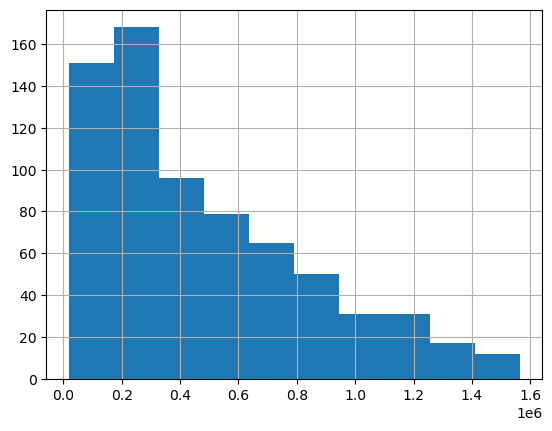

In [17]:
train['total'].hist()

# 4.데이터 전처리

In [18]:
target = train.pop('total')
target

0      823457.2500000000
1      120330.0000000000
2      510788.2500000001
3      733572.0000000000
4      951567.7500000000
             ...        
695    688038.7500000000
696    170352.0000000000
697    391797.0000000000
698    986296.5000000000
699   1535625.0000000000
Name: total, Length: 700, dtype: float64

In [19]:
# 원핫인코딩
print(train.shape, test.shape)
train = pd.get_dummies(train)
test = pd.get_dummies(test)
print(train.shape, test.shape)

(700, 9) (300, 9)
(700, 30) (300, 30)


# 5. 검증데이터 분할

In [21]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train, target, test_size=0.2,random_state=0)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape 

((560, 30), (140, 30), (560,), (140,))

# 6.머신러닝 학습 및 평가

In [22]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)**0.5

In [31]:
# 선형회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_tr, y_tr)
pred = lr.predict(X_val)
rmse(y_val, pred)

373920.97468712926

In [26]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_tr, y_tr)
pred = rf.predict(X_val)
rmse(y_val, pred)

385935.56337360526

In [30]:
# Xgboost
import xgboost as xgb
xg = xgb.XGBRegressor(random_state=0)
xg.fit(X_tr, y_tr)
pred = xg.predict(X_val)
rmse(y_val, pred)

442570.7070483747

In [29]:
# LightGBM
import lightgbm as lgb
lg = lgb.LGBMRegressor(random_state=0)
lg.fit(X_tr, y_tr)
pred = lg.predict(X_val)
rmse(y_val, pred)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 120
[LightGBM] [Info] Number of data points in the train set: 560, number of used features: 30
[LightGBM] [Info] Start training from score 489675.093750
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

404369.88780394377

# 7. 예측 및 결과 파일 생성

In [32]:
pred = lr.predict(test)
result = pd.DataFrame({
    'pred' : pred
})
result

,pred
0,482304.0000000000
1,476160.0000000000
2,489472.0000000000
3,420864.0000000000
4,600064.0000000000
...,...
295,496640.0000000000
296,553984.0000000000
297,541696.0000000000
298,551936.0000000000


In [34]:
result.to_csv('result.csv',index=False)

In [35]:
pd.read_csv('result.csv')

,pred
0,482304.0000000000
1,476160.0000000000
2,489472.0000000000
3,420864.0000000000
4,600064.0000000000
...,...
295,496640.0000000000
296,553984.0000000000
297,541696.0000000000
298,551936.0000000000
